In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import timedelta
import datetime
import matplotlib.dates as mdates
from matplotlib.font_manager import FontProperties
import math
import seaborn as sns

In [2]:
#富山県の感染症データはここにあります。
#url1 = "https://toyama-pref.box.com/shared/static/nxsc7v7cjy09usa89a1o4ju9gfld0za7.csv"
#url2 = "https://toyama-pref.box.com/shared/static/vaowrw2ql5st13j9bgqbceg8htryqdij.csv"
#日次で更新してくれている。まずはこれをpandasに読み込ませます。

In [9]:
#富山県の感染者データ読込み 陽性患者属性のみ (url2)

df = pd.read_csv("https://toyama-pref.box.com/shared/static/vaowrw2ql5st13j9bgqbceg8htryqdij.csv",
                parse_dates=[0])


df.head(-5)

,No,市番号,検査結果判明日,年代,性別,居住地,職業,市区町村名,発症日,状態,症状,渡航歴の有無,備考
0,1,感染者1,2020-03-30 00:00:00,20代,女,富山市,卒業生,富山市,2020-03-24,入院中,軽症・中等症,x,NaN
1,2,A,2020-03-31 00:00:00,20代,女,南砺市,看護師,NaN,2020-03-28,入院中,軽症・中等症,x,NaN
2,3,感染者2,2020-03-31 00:00:00,20代,女,富山市,保育士,富山市,NaN,入院中,無症状,x,NaN
3,4,感染者3,2020-03-31 00:00:00,20代,女,富山市,就職予定者,富山市,2020-03-28,入院中,軽症・中等症,x,NaN
4,5,‐,2020-04-01 00:00:00,20代,男,射水市,新規採用教員,NaN,2020-03-28,入院中,軽症・中等症,x,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41377,41482,NaN,2022-07-07 00:00:00,20代,男,南砺市,NaN,NaN,2022-07-07,入院中,軽症・中等症,x,NaN
41378,41483,NaN,2022-07-07 00:00:00,10歳未満,女,砺波市,NaN,NaN,2022-07-06,入院中,軽症・中等症,x,NaN
41379,41484,NaN,2022-07-07 00:00:00,10歳未満,女,砺波市,NaN,NaN,2022-07-07,入院中,軽症・中等症,x,NaN
41380,41485,NaN,2022-07-07 00:00:00,10歳未満,女,砺波市,NaN,NaN,2022-07-07,入院中,軽症・中等症,x,NaN


In [10]:
df.iloc[0]

No                           1
市番号                       感染者1
検査結果判明日    2020-03-30 00:00:00
年代                         20代
性別                           女
居住地                        富山市
職業                         卒業生
市区町村名                      富山市
発症日                 2020-03-24
状態                         入院中
症状                      軽症・中等症
渡航歴の有無                       x
備考                         NaN
Name: 0, dtype: object

In [11]:
clus = ["年代", "性別", "居住地", "職業", "発症日", "状態", "症状", "渡航歴の有無"]
df = df[clus]
display(df.head(10))

,年代,性別,居住地,職業,発症日,状態,症状,渡航歴の有無
0,20代,女,富山市,卒業生,2020-03-24,入院中,軽症・中等症,x
1,20代,女,南砺市,看護師,2020-03-28,入院中,軽症・中等症,x
2,20代,女,富山市,保育士,NaN,入院中,無症状,x
3,20代,女,富山市,就職予定者,2020-03-28,入院中,軽症・中等症,x
4,20代,男,射水市,新規採用教員,2020-03-28,入院中,軽症・中等症,x
5,50代,女,富山市,介護施設職員,2020-03-31,入院中,軽症・中等症,x
6,20代,男,富山市,会社員,NaN,入院中,無症状,x
7,50代,女,射水市,国家公務員,2020-03-30,入院中,軽症・中等症,x
8,20代,女,富山市,飲食店店員,2020-03-27,入院中,軽症・中等症,x
9,50代,男,富山市,ライブハウス経営者,2020-03-24,入院中,軽症・中等症,x


In [12]:
print(df["発症日"].isnull().count())


41387


<AxesSubplot:>

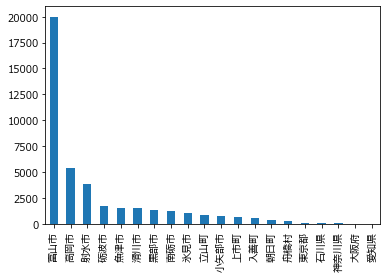

In [21]:
%matplotlib inline
plt.rcParams['font.family'] = "Meiryo"

df_jykyo = df["居住地"].value_counts()
df_jykyo[:20].plot.bar()

<AxesSubplot:>

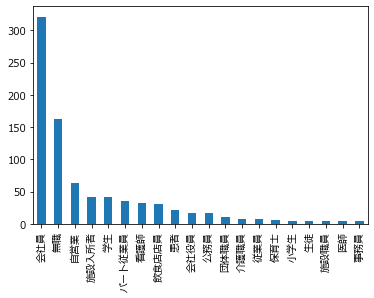

In [22]:
%matplotlib inline
plt.rcParams['font.family'] = "Meiryo"

df_job = df["職業"].value_counts()
df_job[:20].plot.bar()

<AxesSubplot:ylabel='年代'>

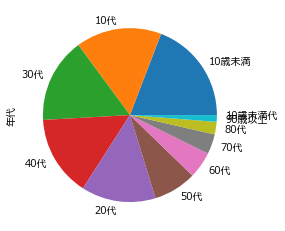

In [25]:
%matplotlib inline
plt.rcParams['font.family'] = "Meiryo"

df_age = df["年代"].value_counts()
#df_age.plot.bar()
df_age.plot.pie()